In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("stocks.csv")

In [3]:
df

Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  64120100  
2    150.639999  56007100  
3    151.009995  57450700  
4    153.850006  62199000  
..          ...       ...  
243  107.709999  20926300  
244  105.980003  20343100  
245  106.120003  17116300  
246  105.209999  19780600  
247  106.214996  20705300  

[248 rows x 8 columns]

In [4]:
df.head()

Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000

In [5]:
df.tail()

Ticker        Date        Open        High         Low       Close  \
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
243  107.709999  20926300  
244  105.980003  20343100  
245  106.120003  17116300  
246  105.209999  19780600  
247  106.214996  20705300

In [6]:
df.describe()

Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764999  212.614998  208.184998  209.920006  209.920006   
75%    304.177505  307.565002  295.437500  303.942505  303.942505   
max    372.410004  373.829987  361.739990  366.829987  366.829987   

             Volume  
count  2.480000e+02  
mean   3.208210e+07  
std    2.233590e+07  
min    2.657900e+06  
25%    1.714180e+07  
50%    2.734000e+07  
75%    4.771772e+07  
max    1.133164e+08

In [7]:
df.describe(include="all")

Ticker        Date        Open        High         Low       Close  \
count     248         248  248.000000  248.000000  248.000000  248.000000   
unique      4          62         NaN         NaN         NaN         NaN   
top      AAPL  2023-02-07         NaN         NaN         NaN         NaN   
freq       62           4         NaN         NaN         NaN         NaN   
mean      NaN         NaN  215.252093  217.919662  212.697452  215.381674   
std       NaN         NaN   91.691315   92.863023   90.147881   91.461989   
min       NaN         NaN   89.540001   90.129997   88.860001   89.349998   
25%       NaN         NaN  135.235004  137.440004  134.822495  136.347498   
50%       NaN         NaN  208.764999  212.614998  208.184998  209.920006   
75%       NaN         NaN  304.177505  307.565002  295.437500  303.942505   
max       NaN         NaN  372.410004  373.829987  361.739990  366.829987   

         Adj Close        Volume  
count   248.000000  2.480000e+02  
unique         NaN           NaN  
top            NaN           NaN  
freq           NaN           NaN  
mean    215.362697  3.208210e+07  
std      91.454750  2.233590e+07  
min      89.349998  2.657900e+06  
25%     136.347498  1.714180e+07  
50%     209.920006  2.734000e+07  
75%     303.942505  4.771772e+07  
max     366.829987  1.133164e+08

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [9]:
df.shape

(248, 8)

In [10]:
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Feature Engineering: Adding Moving Averages & Volatility
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Volatility'] = df['Close'].pct_change().rolling(window=7).std()
df.dropna(inplace=True)  # Drop rows with NaN values due to rolling calculations

In [13]:
df.isnull().sum()

Ticker        0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
MA_7          0
MA_30         0
Volatility    0
dtype: int64

In [14]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Ticker        0.0
Date          0.0
Open          0.0
High          0.0
Low           0.0
Close         0.0
Adj Close     0.0
Volume        0.0
MA_7          0.0
MA_30         0.0
Volatility    0.0
dtype: float64


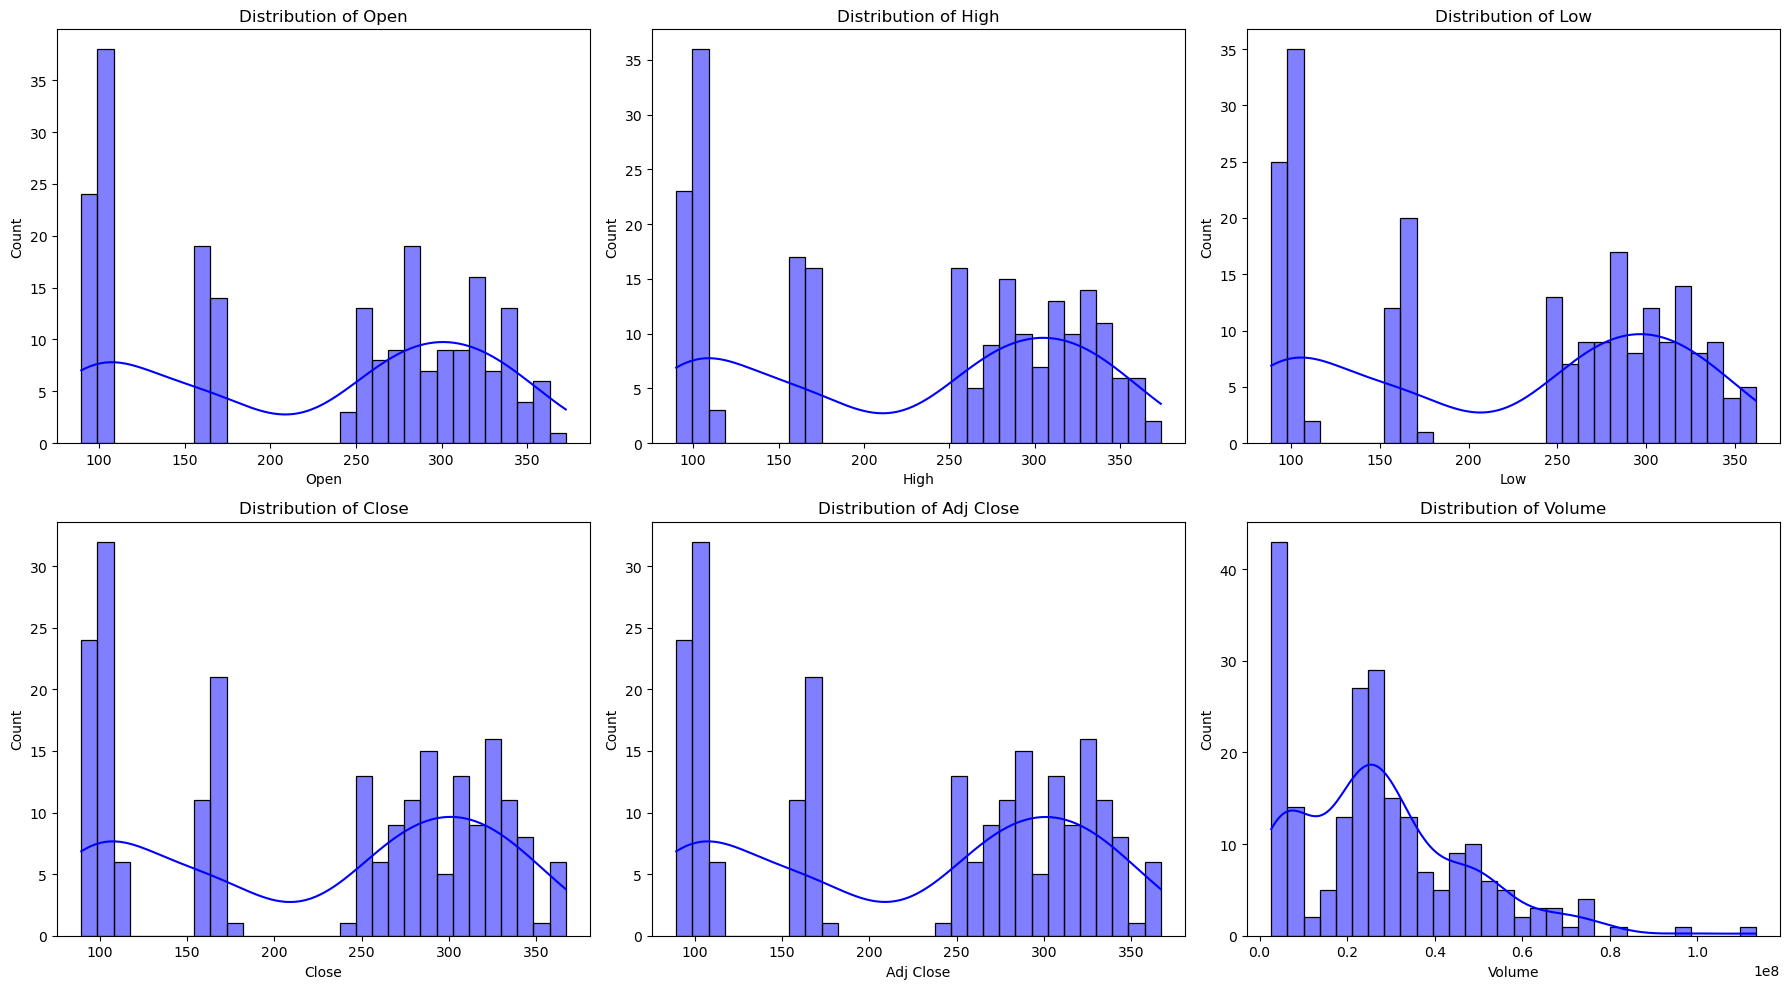

In [15]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot distributions
for ax, col in zip(axes.flat, columns):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='blue')
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


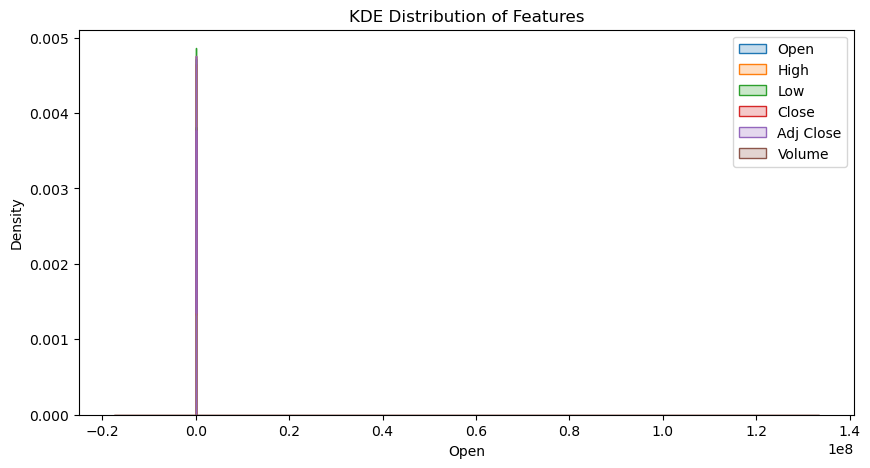

In [16]:
plt.figure(figsize=(10, 5))
for col in columns:
    sns.kdeplot(df[col], label=col, fill=True)
plt.legend()
plt.title("KDE Distribution of Features")
plt.show()

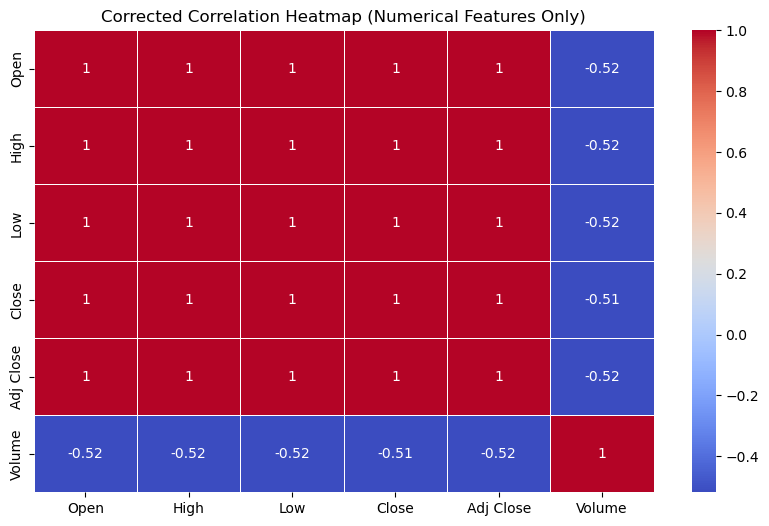

In [17]:
# Compute correlation only for numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
corr_matrix = df[numerical_cols].corr()

# Plot corrected heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Corrected Correlation Heatmap (Numerical Features Only)")
plt.show()


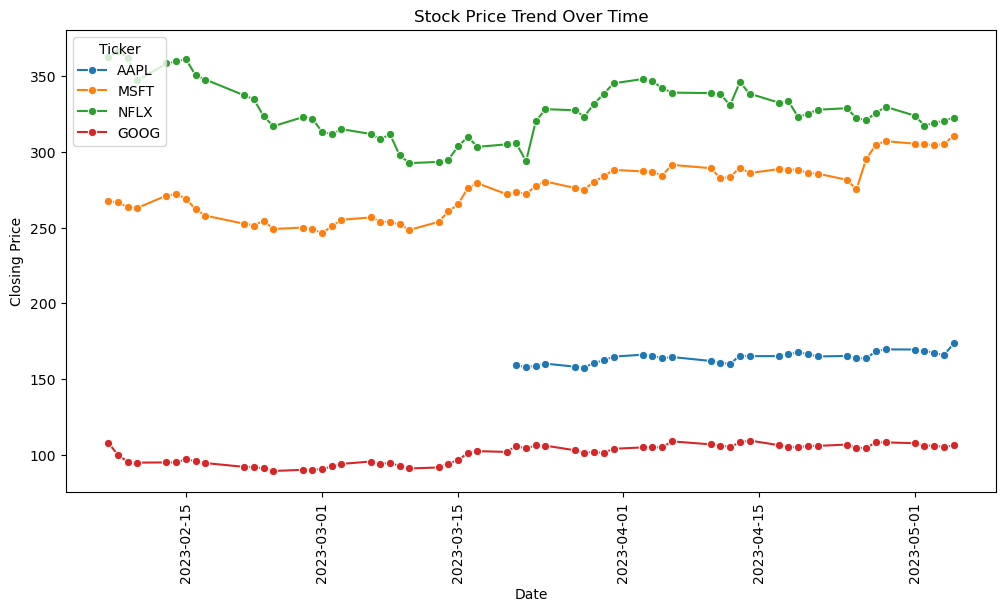

In [18]:
# Plot stock price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Close"], hue=df["Ticker"], marker="o", linewidth=1.5)
plt.title("Stock Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=90)
plt.legend(title="Ticker", loc="upper left")
plt.show()


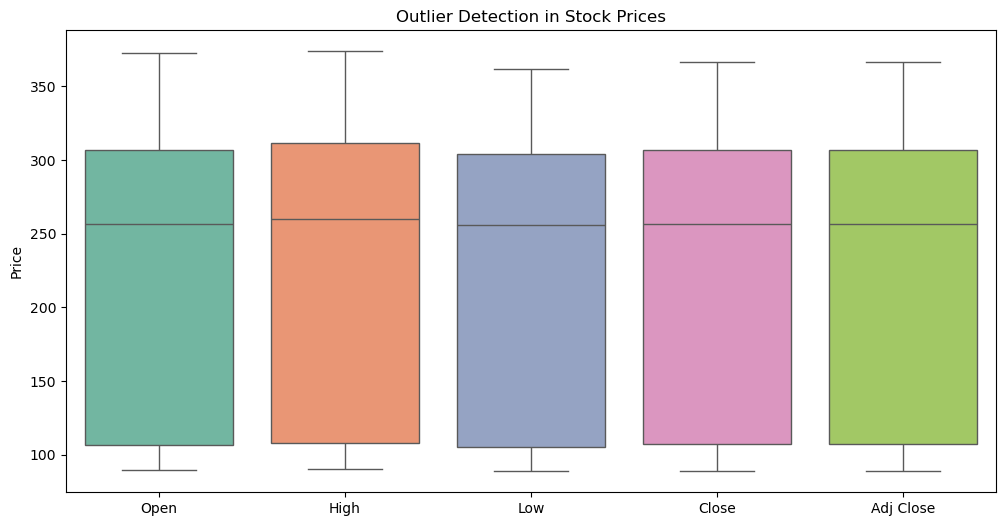

In [19]:
# Boxplot to detect outliers in stock prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close']], palette="Set2")
plt.title("Outlier Detection in Stock Prices")
plt.ylabel("Price")
plt.show()


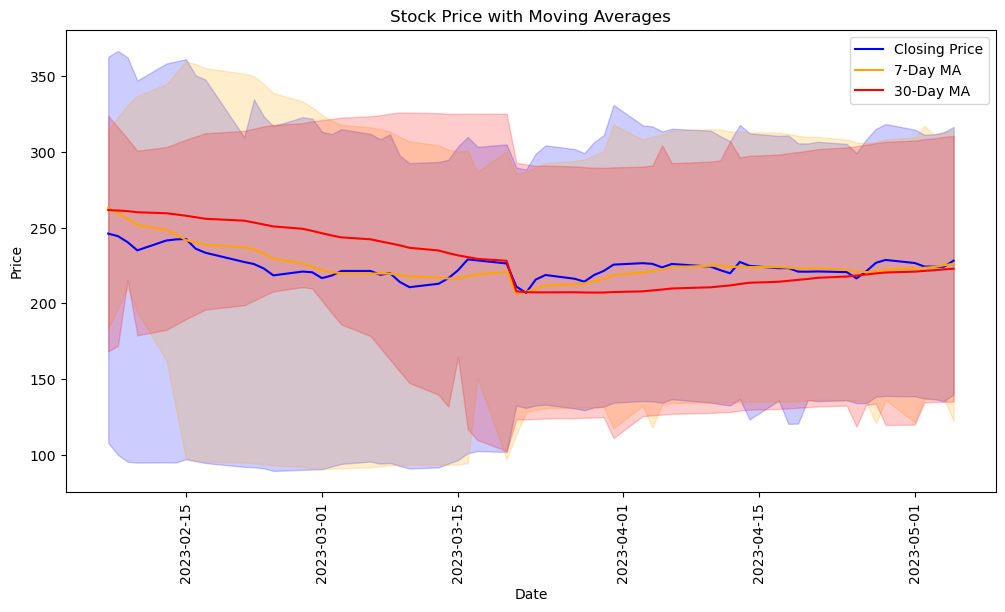

In [20]:
# Plot Moving Averages
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Close"], label="Closing Price", color="blue")
sns.lineplot(x=df["Date"], y=df["MA_7"], label="7-Day MA", color="orange")
sns.lineplot(x=df["Date"], y=df["MA_30"], label="30-Day MA", color="red")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.legend()
plt.show()


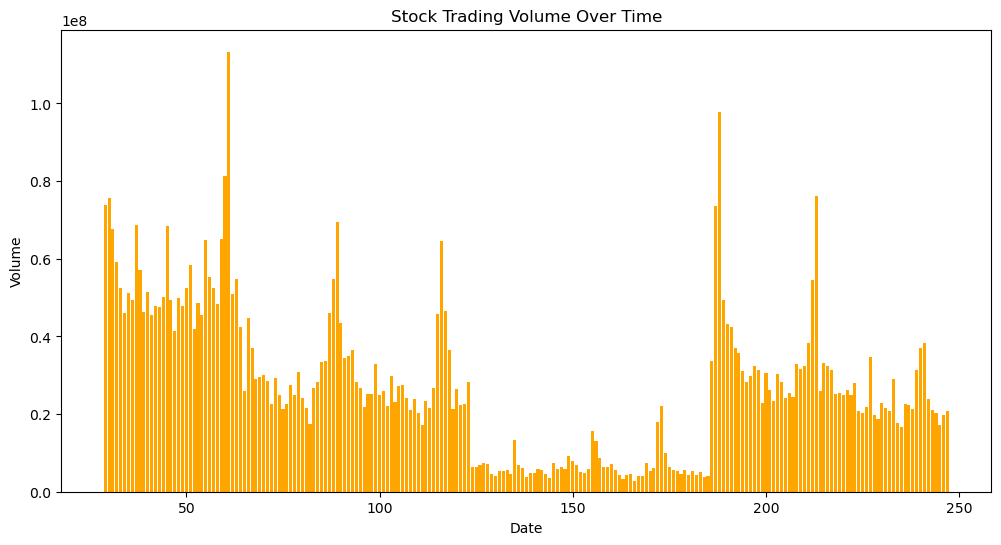

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='orange')
plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


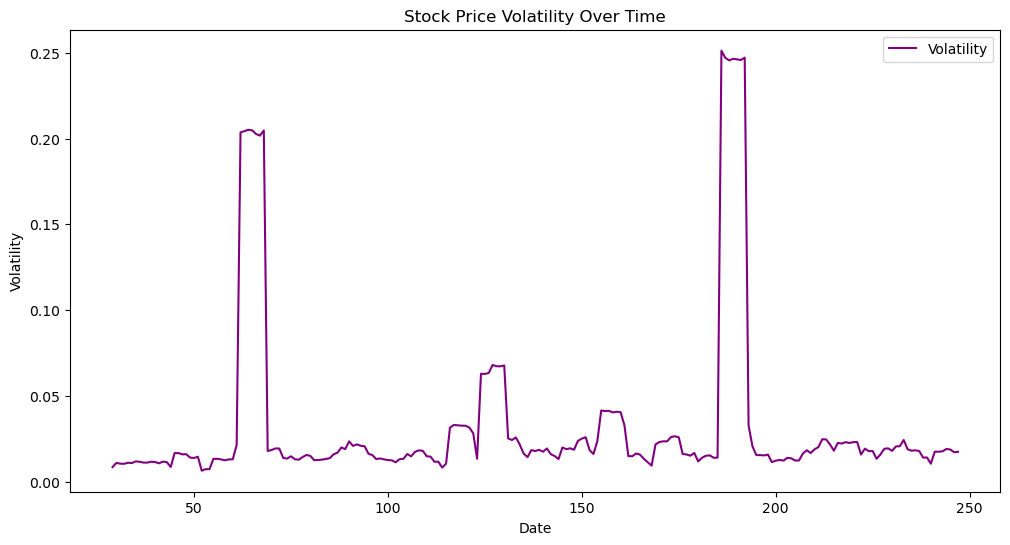

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='Volatility', color='purple')
plt.title("Stock Price Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


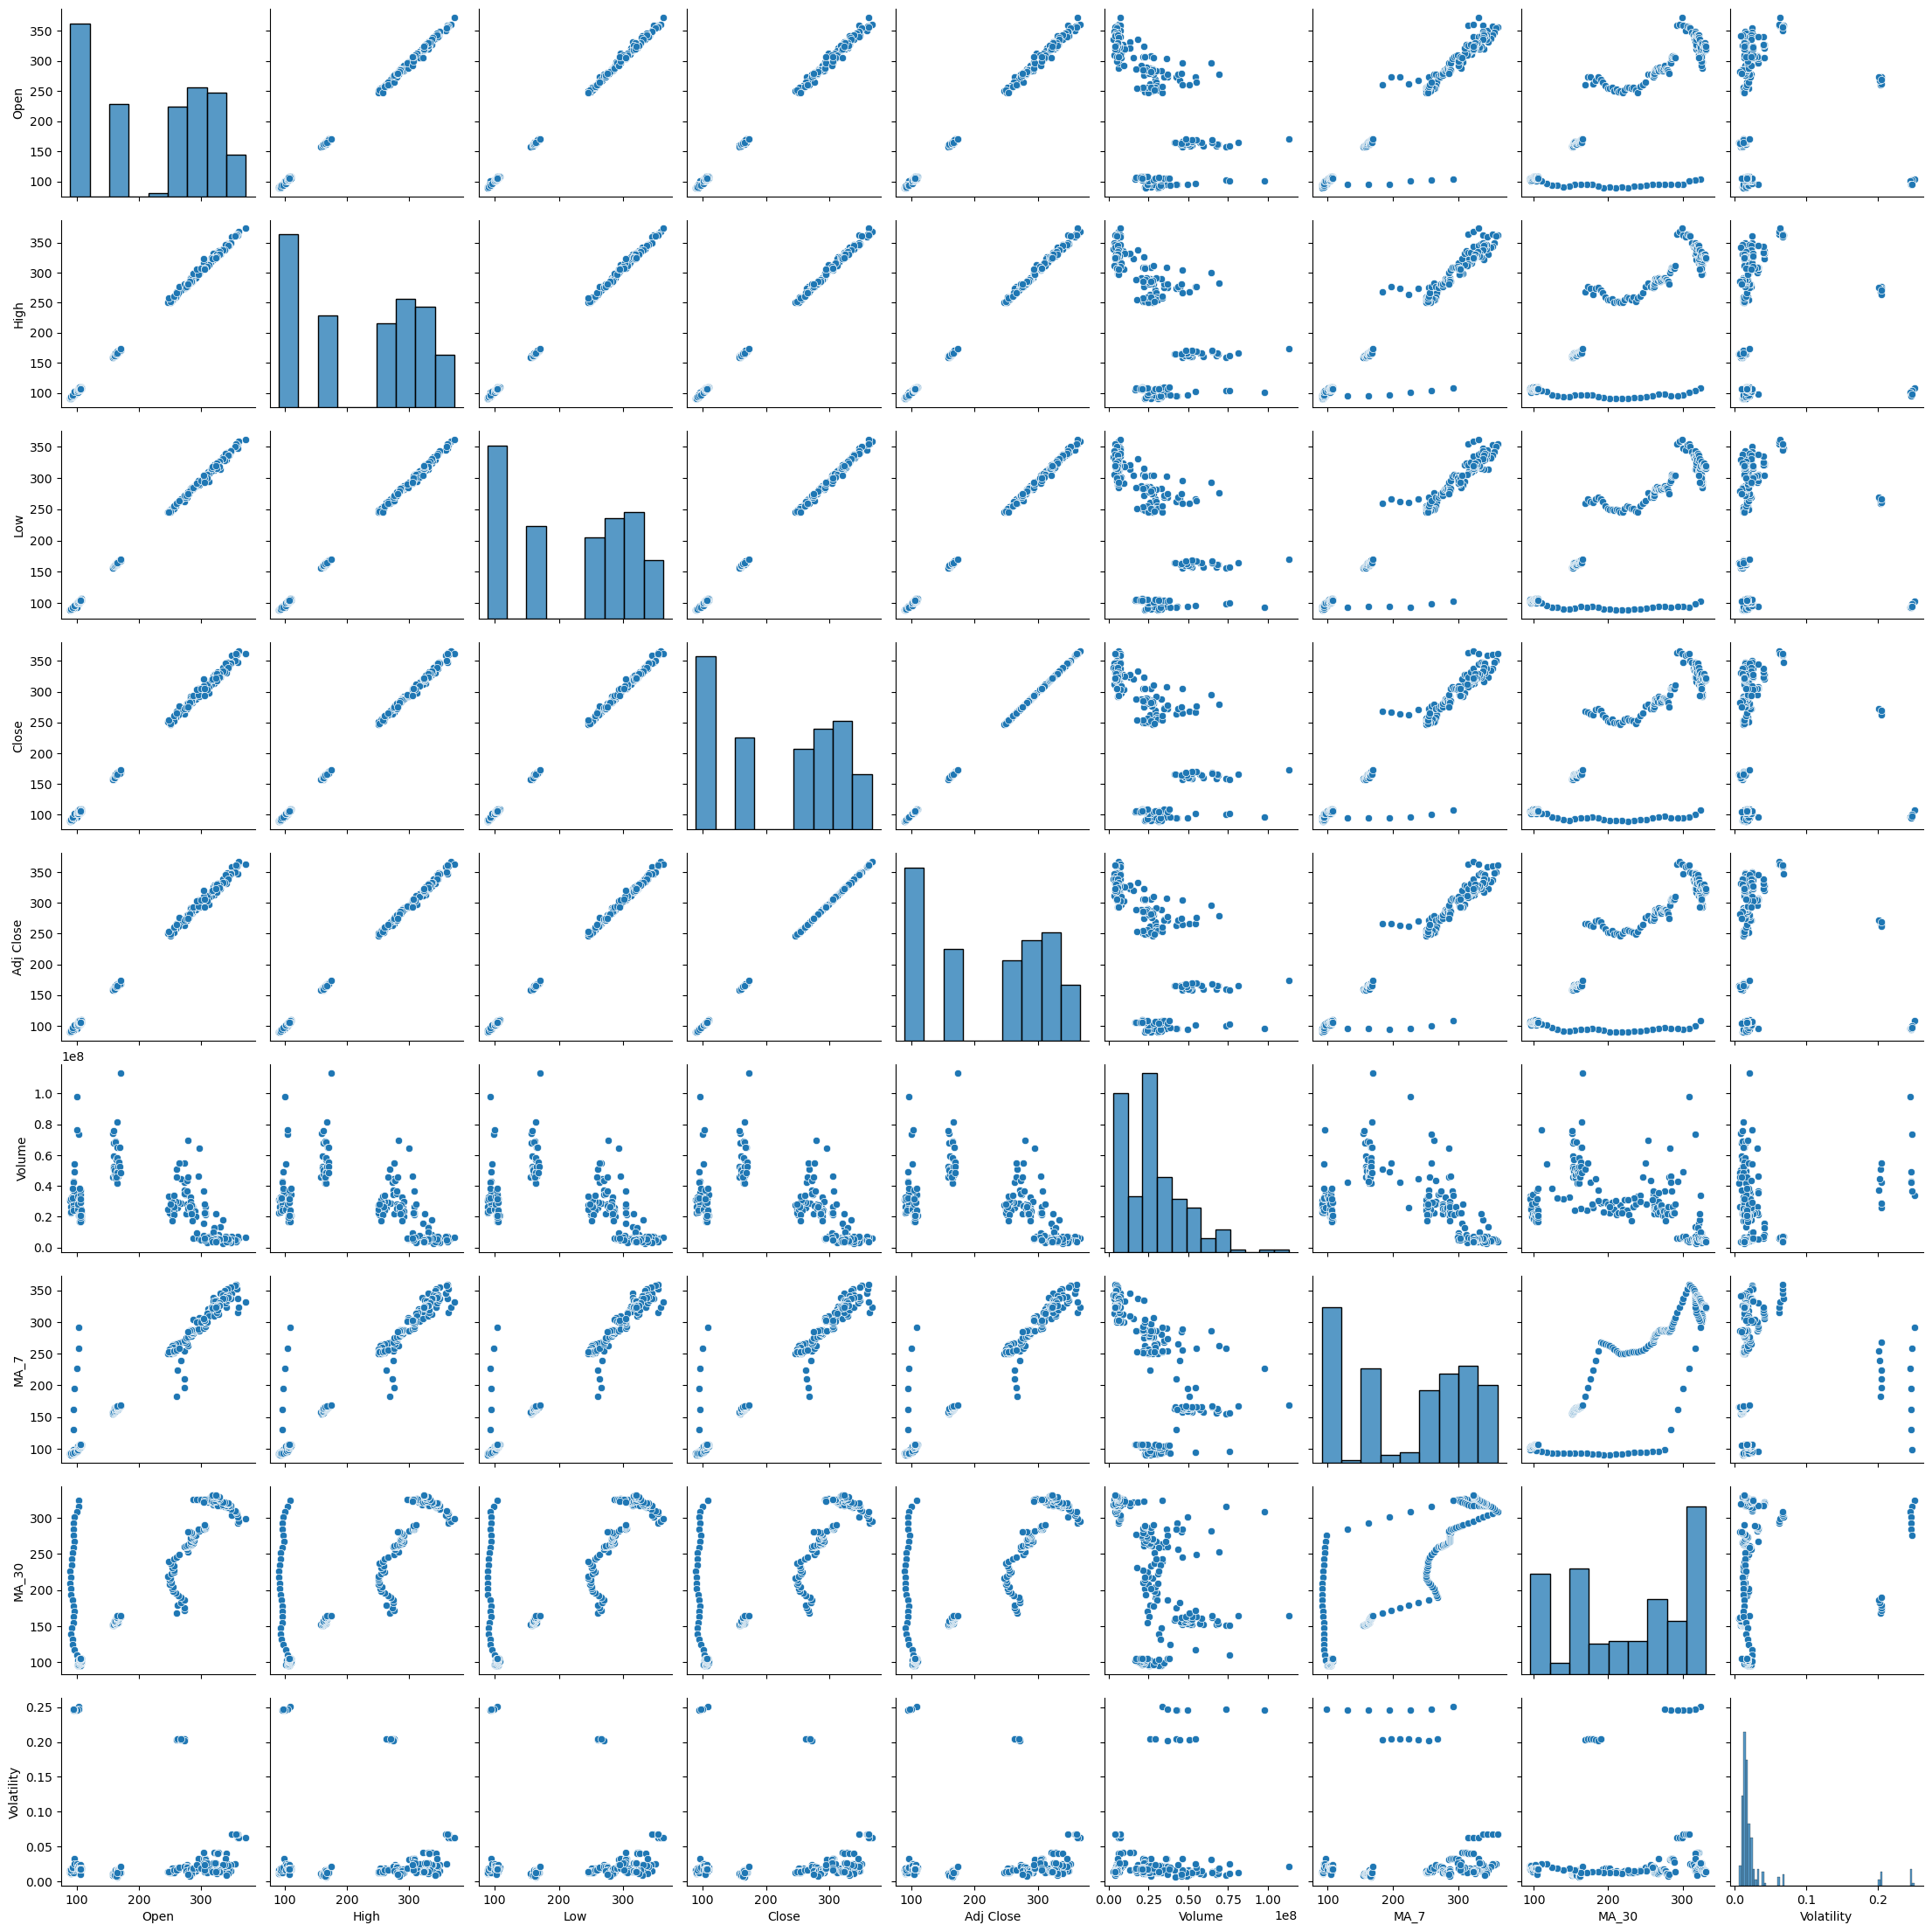

In [23]:
sns.pairplot(df)
plt.show()

RMSE - Random Forest: 18.2328
RMSE - XGBoost: 14.1456


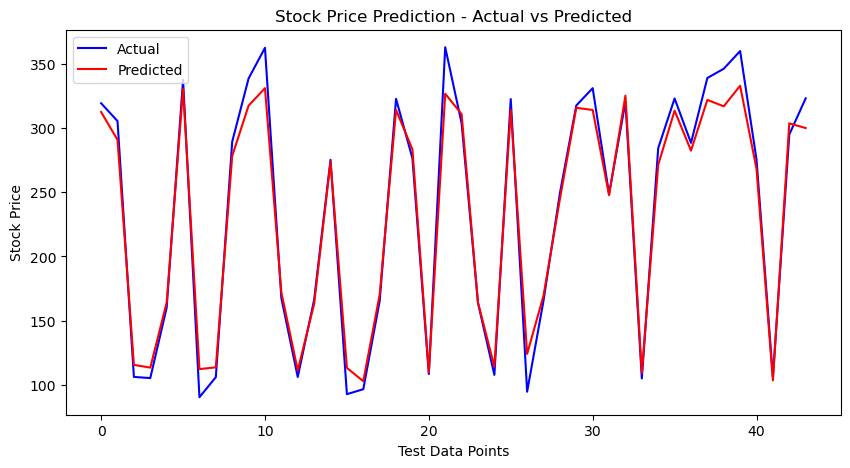

R¬≤ Score - Random Forest (Train): 0.9643
R¬≤ Score - Random Forest (Test): 0.9654
R¬≤ Score - XGBoost (Train): 0.9734
R¬≤ Score - XGBoost (Test): 0.9792


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Define Features and Target
features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_30', 'Volatility']
X = df[features]
y = df['Close']
# üöÄ Apply Min-Max Scaling Before Training
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# üöÄ Random Forest Model (With Reduced Complexity)
rf_model = RandomForestRegressor(
    n_estimators=30, max_depth=3, min_samples_split=50, min_samples_leaf=20, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

# üöÄ XGBoost Model (With Regularization)
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,  
    learning_rate=0.02,  
    max_depth=3,  
    min_child_weight=10,  
    reg_alpha=10,  
    reg_lambda=10,  
    subsample=0.95,  
    colsample_bytree=0.15  
)
xgb_model.fit(X_train, y_train)
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

# üìÇ Save Models & Scaler for Future Prediction
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("xgboost.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

with open("scaler.pkl", "wb") as f:  # Save the scaler for future transformations
    pickle.dump(scaler, f)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Print RMSE Results
print(f'RMSE - Random Forest: {rmse_rf:.4f}')
print(f'RMSE - XGBoost: {rmse_xgb:.4f}')

# üìà Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_xgb, label='Predicted', color='red')
plt.title('Stock Price Prediction - Actual vs Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# üèÜ Calculate R¬≤ Scores
r2_rf_train = r2_score(y_train, y_pred_rf_train)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print R¬≤ Scores
print(f'R¬≤ Score - Random Forest (Train): {r2_rf_train:.4f}')
print(f'R¬≤ Score - Random Forest (Test): {r2_rf:.4f}')
print(f'R¬≤ Score - XGBoost (Train): {r2_xgb_train:.4f}')
print(f'R¬≤ Score - XGBoost (Test): {r2_xgb:.4f}')


In [25]:
# üìå Sample Input (Replace with real values)
sample_input = np.array([[159.300003, 162.139999, 157.809998, 75701800, 155.848572, 151.744000, 0.010931]])

# Ensure input is a DataFrame to match model training format
sample_df = pd.DataFrame(sample_input, columns=features)

# üîÑ Apply the SAME SCALING used during training
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

sample_scaled = scaler.transform(sample_df)  # Scale input

# üéØ Make Predictions
predicted_price_xgb = xgb_model.predict(sample_scaled)[0]
predicted_price_rf = rf_model.predict(sample_scaled)[0]

# üèÜ Print Predictions
print(f"üìà Predicted Stock Price (XGBoost): {predicted_price_xgb:.2f}")
print(f"üìâ Predicted Stock Price (Random Forest): {predicted_price_rf:.2f}")


üìà Predicted Stock Price (XGBoost): 161.96
üìâ Predicted Stock Price (Random Forest): 137.52


C:\Users\Varun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [26]:
df

Ticker       Date        Open        High         Low       Close  \
29    AAPL 2023-03-21  157.320007  159.399994  156.539993  159.279999   
30    AAPL 2023-03-22  159.300003  162.139999  157.809998  157.830002   
31    AAPL 2023-03-23  158.830002  161.550003  157.679993  158.929993   
32    AAPL 2023-03-24  158.860001  160.339996  157.850006  160.250000   
33    AAPL 2023-03-27  159.940002  160.770004  157.869995  158.279999   
..     ...        ...         ...         ...         ...         ...   
243   GOOG 2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG 2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG 2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG 2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG 2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume        MA_7       MA_30  Volatility  
29   159.279999  73938300  154.797143  151.638000    0.008466  
30   157.830002  75701800  155.848572  151.744000    0.010931  
31   158.929993  67622100  156.754286  151.977667    0.010472  
32   160.250000  59196500  157.791428  152.290334    0.010397  
33   158.279999  52390300  158.138569  152.532667    0.011014  
..          ...       ...         ...         ...         ...  
243  107.709999  20926300  106.578572  105.476000    0.017653  
244  105.980003  20343100  106.588572  105.611000    0.019031  
245  106.120003  17116300  106.494287  105.620334    0.018726  
246  105.209999  19780600  106.580001  105.653334    0.017137  
247  106.214996  20705300  106.832144  105.651834    0.017381  

[219 rows x 11 columns]

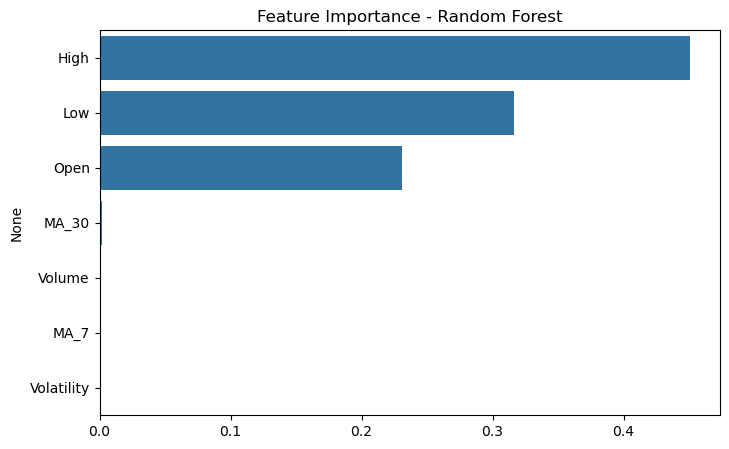

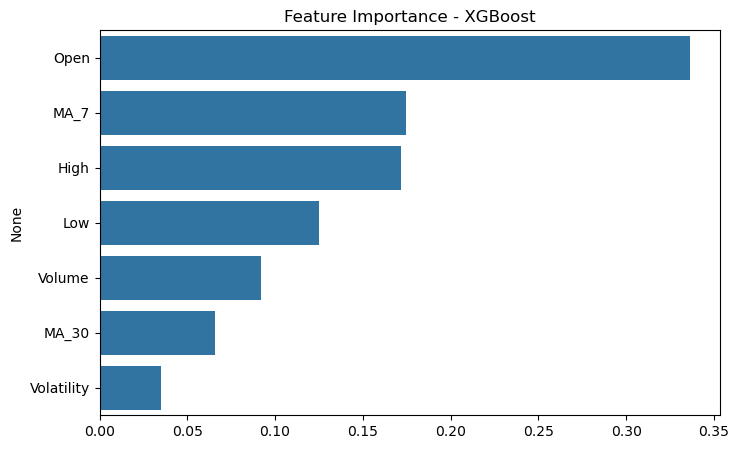

In [27]:
# üìä Feature Importance - Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

# üìä Feature Importance - XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index)
    plt.title("Feature Importance - XGBoost")
    plt.show()
else:
    print("‚ö†Ô∏è XGBoost model has no feature_importances_ attribute! Check if the model trained correctly.")
